## Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import speckleret

## Load pre-computed example speckle

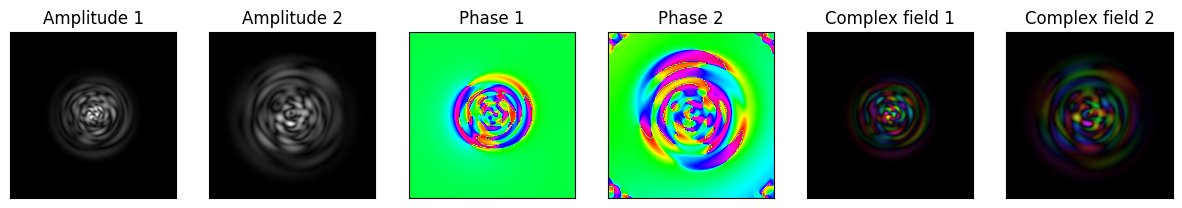

In [3]:
field = np.load('../imports/grin_speckle_example.npy')
ft = speckleret.transforms.fourier_transform(field, pad=2)
_ = speckleret.plots.compare_complex_fields(field, ft, remove_ticks=True)

## Generate a noisy field

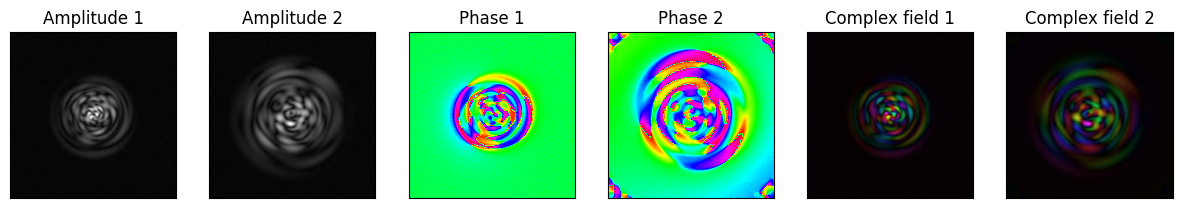

In [27]:
noisy_field = speckleret.noise.add_complex_noise(field, intens_noise_std=0.001, phase_noise_std=1064e-9/100, wavelength=1064e-9)
noisy_ft = speckleret.noise.add_complex_noise(ft, intens_noise_std=0.001, phase_noise_std=1064e-9/100, wavelength=1064e-9)
# noisy_ft = speckleret.transforms.fourier_transform(noisy_field, pad=2)
_ = speckleret.plots.compare_complex_fields(noisy_field, noisy_ft, remove_ticks=True)

## Generate and visualize support

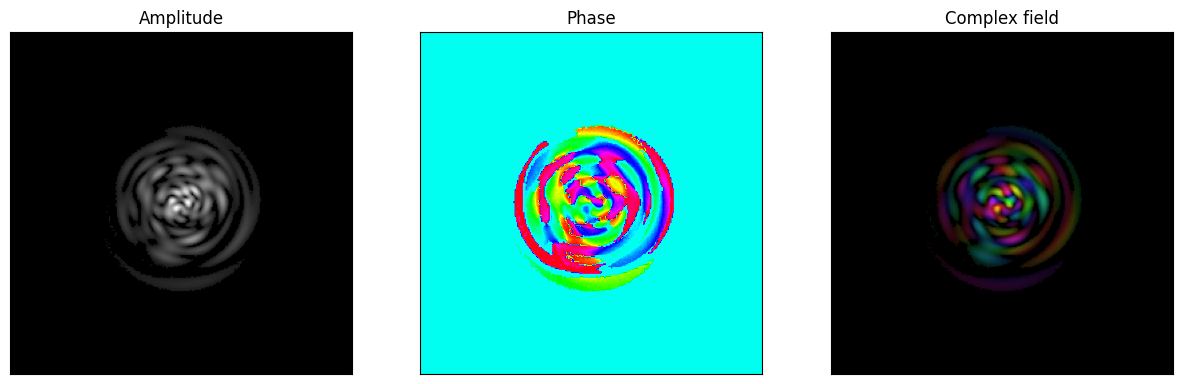

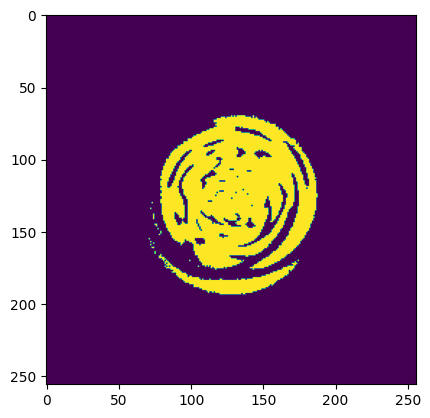

In [31]:
support = speckleret.supports.threshold_support(noisy_field, threshold=0.01)
supported_field = noisy_field * support
_ = speckleret.plots.complex_imshow(supported_field, remove_ticks=True)
plt.show()

plt.imshow(support)

## Run retrieval and show convergence and metrics

1 / 1
Quality: 0.9584500863151948
Pearson: 0.9999999999999999


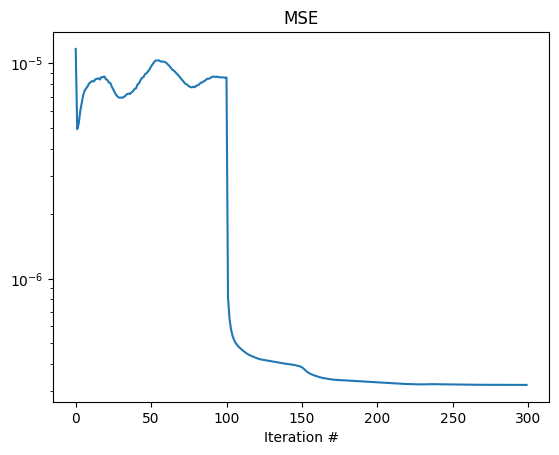

In [30]:
y_hat, ft_hat, results = speckleret.retrieval.hio_er_fourier((np.abs(noisy_field), np.abs(noisy_ft)), support, pad=2, max_iter=1, max_er_iter=200, max_hio_iter=100)

print(f"Quality: {speckleret.metrics.quality(y_hat[support], noisy_field[support])}")
print(f"Pearson: {speckleret.metrics.pearson(y_hat[support], noisy_field[support])}")

plt.figure()
plt.plot(results['mse_plane2'], label='Fourier MSE')
plt.title('MSE')
plt.xlabel('Iteration #')
plt.yscale('log')

In [33]:
print(f"Quality: {speckleret.metrics.quality(y_hat[support], field[support])}")
print(f"Pearson: {speckleret.metrics.pearson(y_hat[support], field[support])}")

Quality: 0.9622833808969822
Pearson: 0.9997286074407628


## Compare retrieved field with initial field

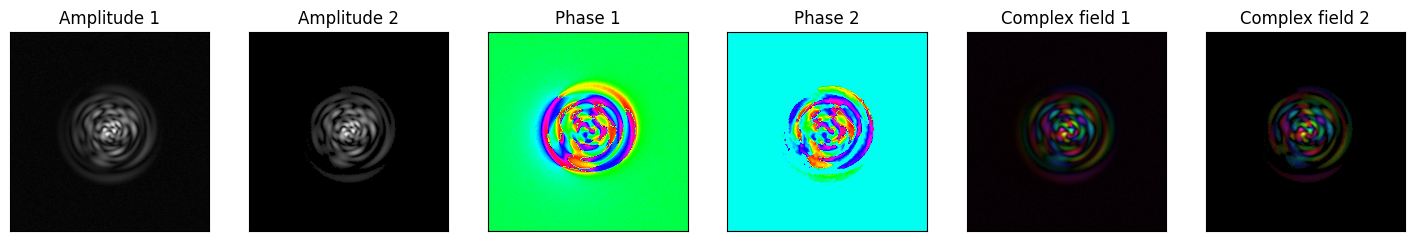

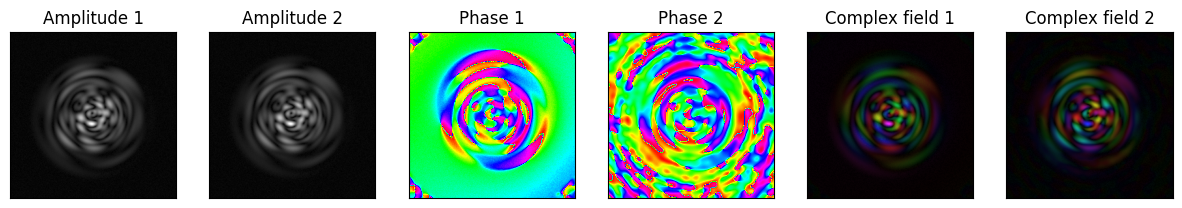

In [34]:
_ = speckleret.plots.compare_complex_fields(noisy_field, y_hat, remove_ticks=True, figsize=(18,8))
_ = speckleret.plots.compare_complex_fields(noisy_ft, ft_hat, remove_ticks=True)